In [2]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [4]:
# load phos catalogs

# COSMOS
cat_cosmos = Table.read('/Volumes/LejaySSD/p_cats_v211221/COSMOS_deep_pcat_211221_gal_cut_params.fits')
cat_cosmos = cat_cosmos[cat_cosmos['inside_u'] == True]
cat_cosmos = cat_cosmos[cat_cosmos['inside_hsc'] == True]
cat_cosmos = cat_cosmos[cat_cosmos['isOutsideMask'] == 1]  # unmasked
cat_gal_cosmos = cat_cosmos[cat_cosmos['isStar'] == 0]  # galaxies
cat_gal_cosmos_nir = cat_gal_cosmos[cat_gal_cosmos['ZPHOT_NIR']>-90]

# XMM-LSS
cat_xmm = Table.read('/Volumes/LejaySSD/p_cats_v211221/XMM-LSS_deep_pcat_211221_gal_cut_params.fits')
cat_xmm = cat_xmm[cat_xmm['inside_uS'] == True]
cat_xmm = cat_xmm[cat_xmm['inside_hsc'] == True]
cat_xmm = cat_xmm[cat_xmm['isOutsideMask'] == 1]  # unmasked
cat_gal_xmm = cat_xmm[cat_xmm['isStar'] == 0]  # galaxies
cat_gal_xmm_nir = cat_gal_xmm[cat_gal_xmm['ZPHOT_NIR']>-90]



In [5]:
# v9 Vincent and Thibaud

cat_v9_v = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
cat_v9_v = cat_v9_v[cat_v9_v['inside_u'] == True]
cat_v9_v = cat_v9_v[cat_v9_v['MASK'] == 0]  # unmasked
cat_v9_v_gal = cat_v9_v[cat_v9_v['OBJ_TYPE'] == 0]  # galaxies

cat_v9_t_gal = Table.read('clauds_cat_v2020/l_cats/COSMOS_deep_v9_lephare_thibaud.fits')  # galaxy selection already done !

# v11 Vincent 11band
cat_v11_11b_v = Table.read('/Volumes/LejaySSD/v11_cats/COSMOS_v11_11bands_v211224_cut_params.fits')
cat_v11_11b_v = cat_v11_11b_v[cat_v11_11b_v['inside_u'] == True]
cat_v11_11b_v = cat_v11_11b_v[cat_v11_11b_v['MASK'] == 0]  # unmasked
cat_v11_11b_v_gal = cat_v11_11b_v[cat_v11_11b_v['OBJ_TYPE'] == 0]  # galaxies

(2 panels) sky plot

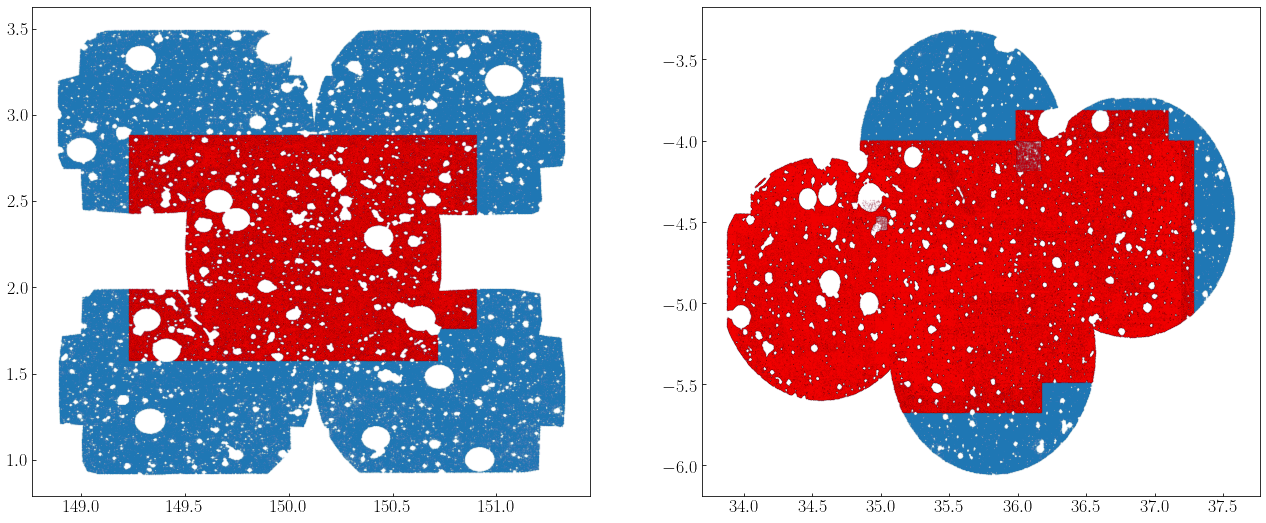

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (22, 9))

axs[0].scatter(cat_cosmos['RA'],cat_cosmos['DEC'],s=0.1,alpha=0.1)
axs[0].scatter(cat_gal_cosmos_nir['RA'],cat_gal_cosmos_nir['DEC'],s=0.1,alpha=0.1,color='r')

axs[1].scatter(cat_xmm['RA'],cat_xmm['DEC'],s=0.1,alpha=0.1)
axs[1].scatter(cat_gal_xmm_nir['RA'],cat_gal_xmm_nir['DEC'],s=0.1,alpha=0.1,color='r')

# print number of objects in both catalogs



In [19]:
# magnitude cut
cat_cosmos_b26 = cat_cosmos[cat_cosmos['i']<26]
cat_xmm_b26 = cat_xmm[cat_xmm['i']<26]
cat_v11_11b_v_gal_b26 = cat_v11_11b_v_gal[cat_v11_11b_v_gal['i']<26]


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


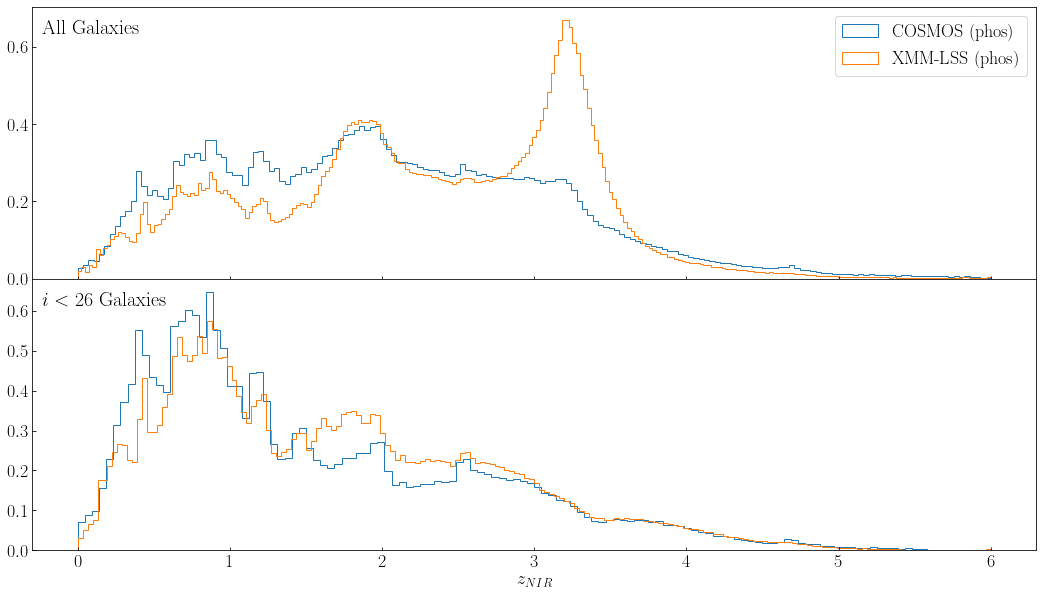

In [7]:
fig, axs = plt.subplots(2,1, figsize = (18, 10),sharex=True)

axs[0].hist(cat_cosmos['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True,label='COSMOS (phos)')
axs[0].hist(cat_xmm['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True,label='XMM-LSS (phos)')
# axs[0].hist(cat_v11_11b_v_gal['Z_ML'],range=(0,6),bins='scott',histtype='step',density=True,label='COSMOS (lephare)')

axs[1].hist(cat_cosmos_b26['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True)
axs[1].hist(cat_xmm_b26['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True)
# axs[1].hist(cat_v11_11b_v_gal_b26['Z_ML'],range=(0,6),bins='scott',histtype='step',density=True)

axs[0].annotate('All Galaxies',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('$i<26$ Galaxies',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].set_xlabel('$z_{NIR}$',fontsize=18)

axs[0].legend(fontsize=18)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.show()

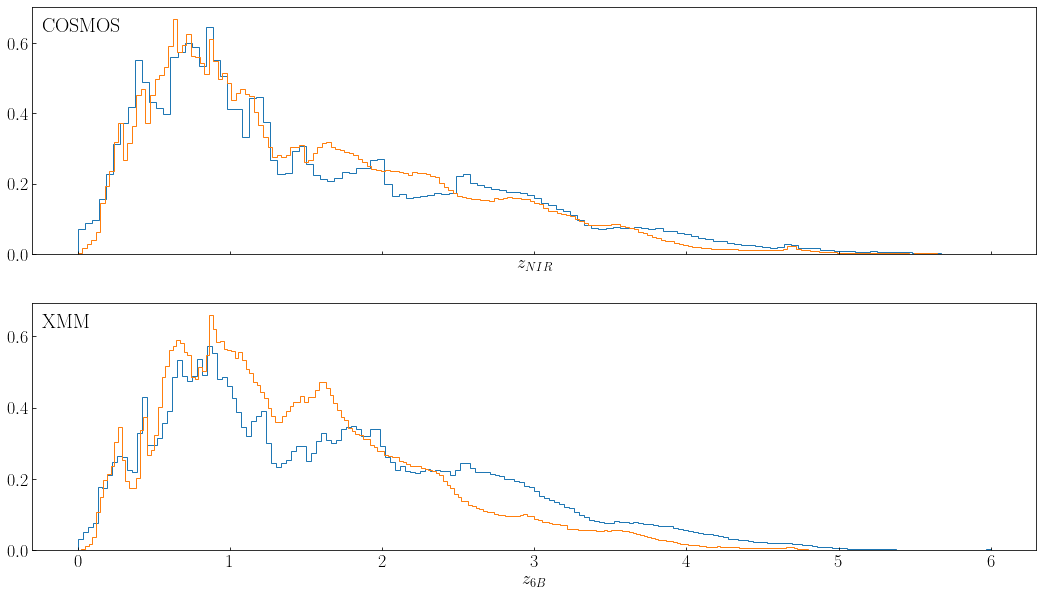

In [24]:
fig, axs = plt.subplots(2,1, figsize = (18, 10),sharex=True)

axs[0].hist(cat_cosmos_b26['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True)
axs[0].hist(cat_cosmos_b26['ZPHOT_6B'],range=(0,6),bins='scott',histtype='step',density=True)
axs[0].annotate('COSMOS',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)
axs[0].set_xlabel('$z_{NIR}$',fontsize=18)

axs[1].hist(cat_xmm_b26['ZPHOT_NIR'],range=(0,6),bins='scott',histtype='step',density=True)
axs[1].hist(cat_xmm_b26['ZPHOT_6B'],range=(0,6),bins='scott',histtype='step',density=True)
axs[1].annotate('XMM',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].set_xlabel('$z_{6B}$',fontsize=18)

fig.subplots_adjust(wspace=0)
plt.show()

Text(0.01, 0.9, 'XMM')

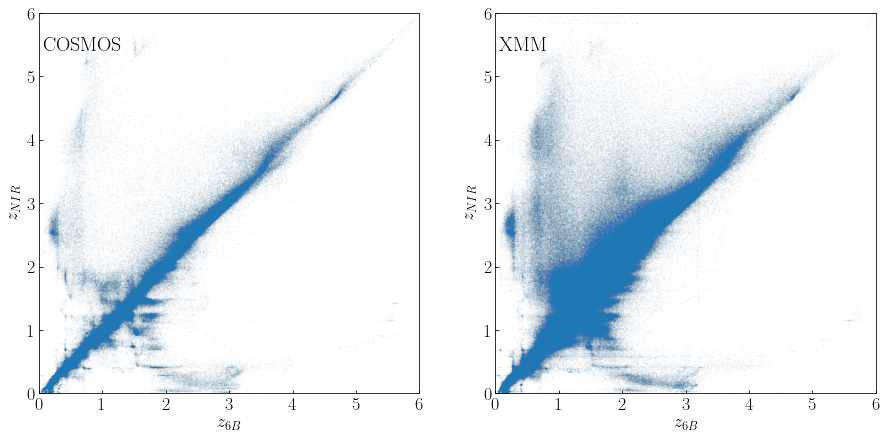

In [18]:
fig, axs = plt.subplots(1,2, figsize = (15,7),sharex=True)

axs[0].scatter(cat_cosmos_b26['ZPHOT_6B'],cat_cosmos_b26['ZPHOT_NIR'],s=0.02,alpha=0.1)
axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{6B}$',fontsize=18)
axs[0].set_ylabel('$z_{NIR}$',fontsize=18)
axs[0].annotate('COSMOS',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)

axs[1].scatter(cat_xmm_b26['ZPHOT_6B'],cat_xmm_b26['ZPHOT_NIR'],s=0.02,alpha=0.1)
axs[1].set_xlim([0,6])
axs[1].set_ylim([0,6])
axs[1].set_xlabel('$z_{6B}$',fontsize=18)
axs[1].set_ylabel('$z_{NIR}$',fontsize=18)
axs[1].annotate('XMM',xy=([0.01,0.9]),xycoords='axes fraction',fontsize=20)


(2 panels) i-mag vs. z plot

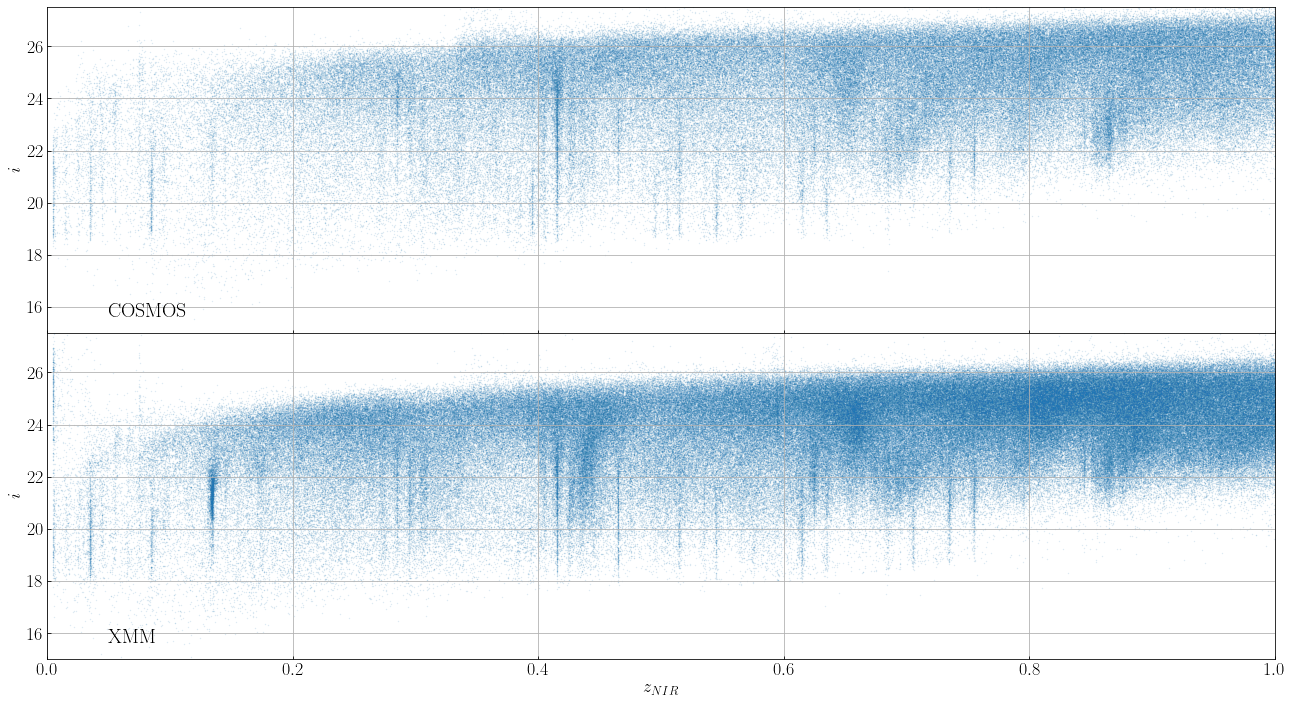

In [25]:
# NIR
band = 'i'
fig, axs = plt.subplots(2,1, figsize = (22, 12),sharex=True)

axs[0].scatter(cat_cosmos['ZPHOT_NIR'],cat_cosmos[band],s=0.1,alpha=0.2)
axs[1].scatter(cat_xmm['ZPHOT_NIR'],cat_xmm[band],s=0.1,alpha=0.2)

axs[0].set_xlim([0,1])
axs[0].set_ylim([15,27.5])
axs[1].set_ylim([15,27.5])

axs[0].annotate('COSMOS',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('XMM',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)

axs[0].set_ylabel('$'+band+'$',fontsize=18)
axs[1].set_ylabel('$'+band+'$',fontsize=18)
axs[1].set_xlabel('$z_{NIR}$',fontsize=18)

axs[0].grid()
axs[1].grid()

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

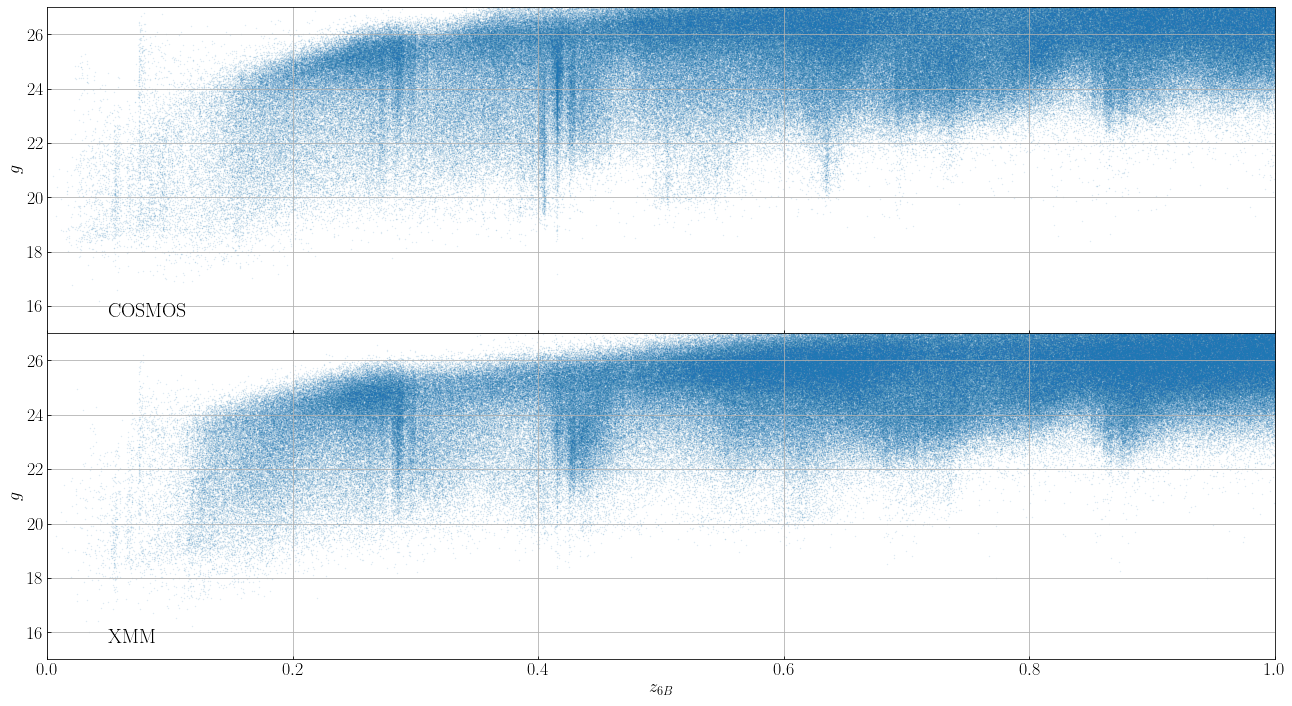

In [7]:
# 6B 

fig, axs = plt.subplots(2,1, figsize = (22, 12),sharex=True)

axs[0].scatter(cat_cosmos['ZPHOT_6B'],cat_cosmos[band],s=0.1,alpha=0.2)
axs[1].scatter(cat_xmm['ZPHOT_6B'],cat_xmm[band],s=0.1,alpha=0.2)

axs[0].set_xlim([0,1])
axs[0].set_ylim([15,27])
axs[1].set_ylim([15,27])

axs[0].annotate('COSMOS',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('XMM',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)
axs[0].set_ylabel('$'+band+'$',fontsize=18)
axs[1].set_ylabel('$'+band+'$',fontsize=18)
axs[1].set_xlabel('$z_{6B}$',fontsize=18)

axs[0].grid()
axs[1].grid()

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

#### In other catalogs

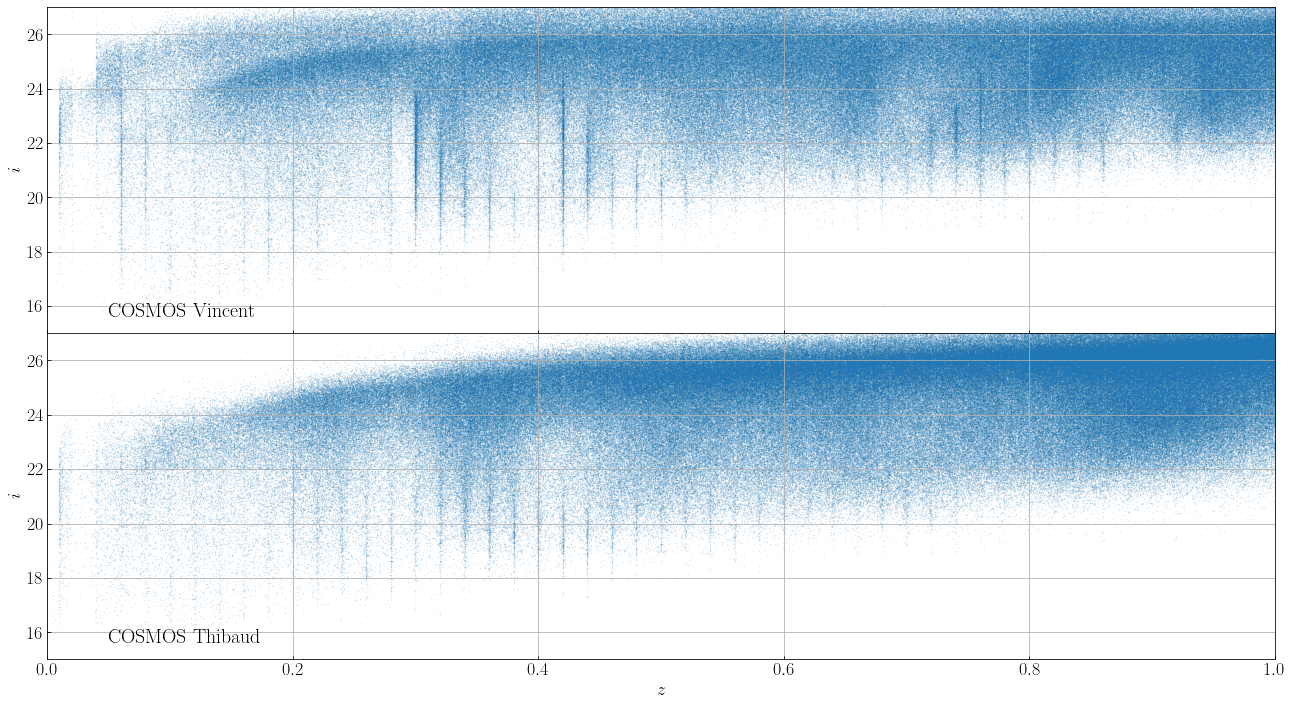

In [34]:
fig, axs = plt.subplots(2,1, figsize = (22, 12),sharex=True)

band = 'i'
axs[0].scatter(cat_v9_v_gal['ZPHOT'],cat_v9_v_gal[band],s=0.1,alpha=0.2)
axs[1].scatter(cat_v9_t_gal['Z_ML_T'],cat_v9_t_gal['i'],s=0.1,alpha=0.2)

axs[0].set_xlim([0,1])
axs[0].set_ylim([15,27])
axs[1].set_ylim([15,27])

axs[0].set_ylabel('$'+band+'$',fontsize=18)
axs[1].set_ylabel('$i$',fontsize=18)
axs[1].set_xlabel('$z$',fontsize=18)

axs[0].annotate('COSMOS Vincent',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('COSMOS Thibaud',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=20)

axs[0].grid()
axs[1].grid()

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

#### check some gals in the spikes are not stars

In [49]:
from astropy.io import ascii, fits
import glob
import matplotlib as mpl

72


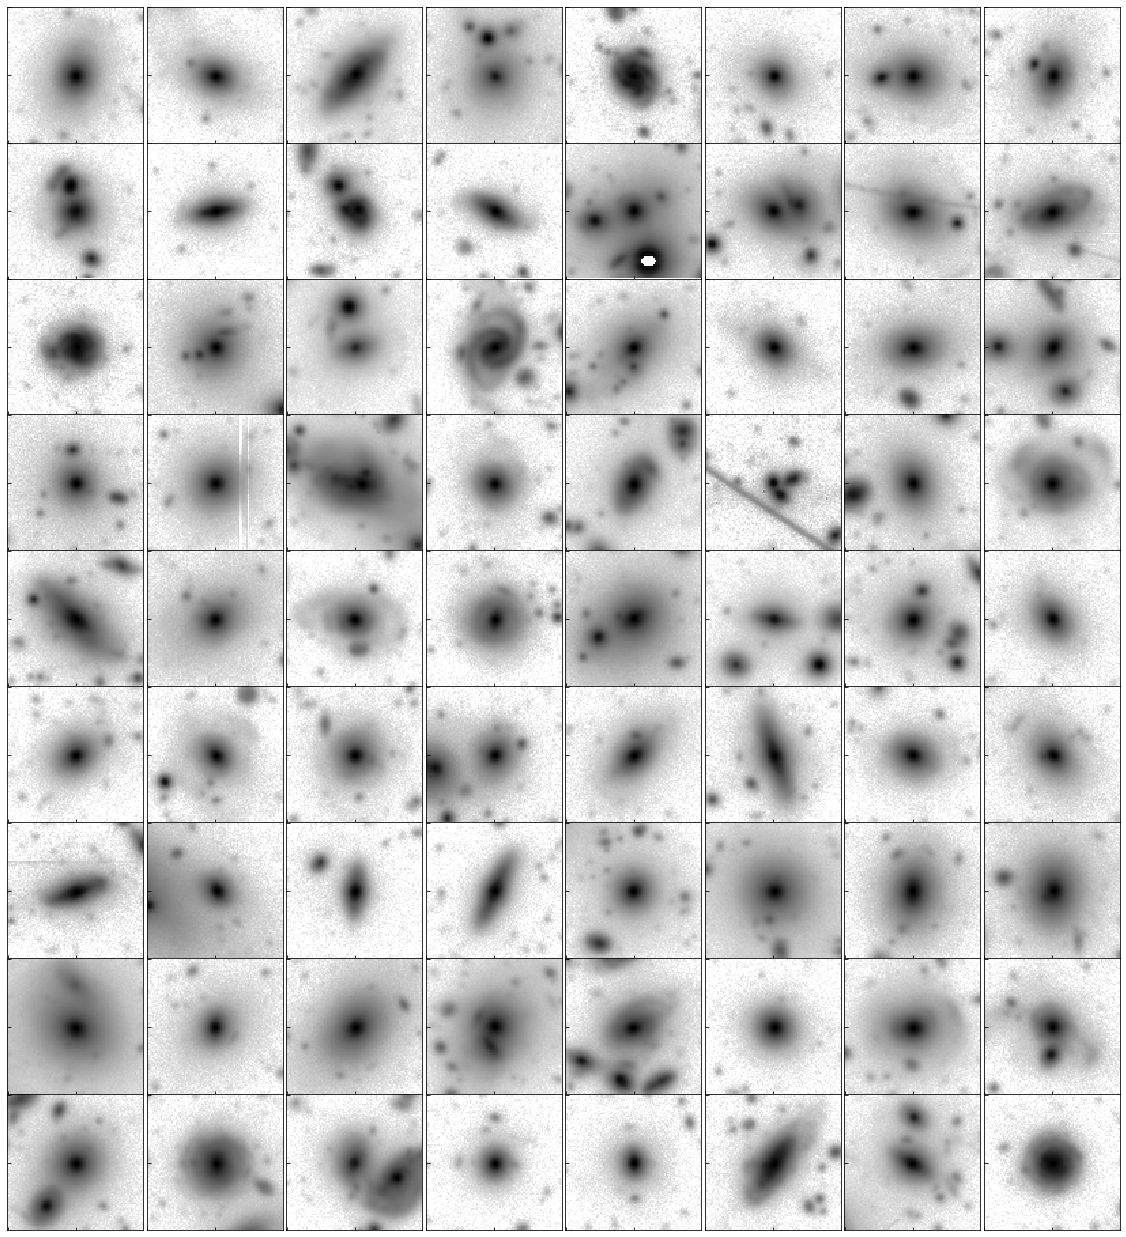

In [54]:
fig, axs = plt.subplots(9, 8, figsize=(8*2.5,9*2.5),sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
gal_list = glob.glob('CUT_deep_catalogs/cut_gal_zspikes/*.fits')
print(len(gal_list))
for i in range(len(gal_list)):
    row = i // 8
    col = i % 8
    
    im = fits.open(gal_list[i])[0].data
    axs[row][col].imshow(im, norm=mpl.colors.LogNorm(), cmap='Greys',vmin=1)
    axs[row][col].set_yticklabels([])
    axs[row][col].set_xticklabels([])